   Repetition   Reps  Weight  Weight_Moved  pct_change
0         2.5   9.25    90.0        821.25         NaN
1         6.5   9.50    90.0        845.00    0.028919
2        10.5   9.75    92.5        893.75    0.057692
3        14.5  10.00    92.5        917.50    0.026573
4        18.5   9.50    92.5        870.00   -0.051771
5        22.5   9.75    92.5        895.00    0.028736


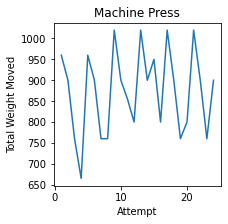

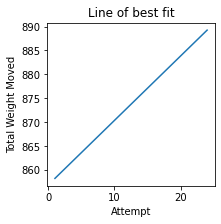

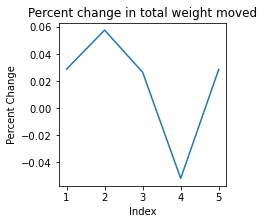


The slope of the line of best fit, m, is: 1.34783

The y-intercept, b, is: 856.90217

The greatest percent change in total weight move is: 0.05769230769230771

This is found at this row: 
   Repetition  Reps  Weight  Weight_Moved  pct_change
2        10.5  9.75    92.5        893.75    0.057692


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#get file name from user
file = input("What is the name of the file you wish to examine? ")

#read file
df = pd.read_csv(file)

#create new column for total weight moved
df["Weight_Moved"] = df["Reps"] * df["Weight"]

#create new dataframe containing the average of every 4 rows 
df_averages = df.groupby(np.arange(len(df))//4).mean()

#create new column to hold % change of the averages
df_averages['pct_change'] = df_averages['Weight_Moved'].pct_change()

#print the dataframe
print(df_averages)

# creating x and y variables
x = df["Repetition"]
y = df["Weight_Moved"]

# Plotting attempt vs total weight moved
plt.figure(figsize=(3, 3))
plt.plot(x, y)
plt.title("Machine Press")
plt.xlabel("Attempt")
plt.ylabel("Total Weight Moved")

# Plotting line of best fit on attempt vs total weight moved
m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(3, 3))
plt.plot(x, m * x + b)
plt.title("Line of best fit")
plt.xlabel("Attempt")
plt.ylabel("Total Weight Moved")

# Plotting percent change in total weight moved vs index
x1 = df_averages["pct_change"]
plt.figure(figsize=(3, 3))
plt.plot(x1)
plt.title("Percent change in total weight moved")
plt.xlabel("Index")
plt.ylabel("Percent Change")

# show graphs
plt.show()

# print the slope
print("\nThe slope of the line of best fit, m, is: " + str(m.round(5)))
# print y intercept
print("\nThe y-intercept, b, is: " + str(b.round(5)))

# print greatest increase
print("\nThe greatest percent change in total weight move is: " +
      str(df_averages["pct_change"].max()))

# print row of greatest increase
print("\nThis is found at this row: ")
print(df_averages.loc[df_averages["pct_change"]
      == df_averages["pct_change"].max()])
